LAPORAN ANALISIS DATASET & JUSTIFIKASI PEMILIHAN ALGORITMA

Judul Laporan: “ANALISIS PREDIKTIF PERFORMA AKADEMIK SISWA BERDASARKAN GAYA BELAJAR DENGAN PENDEKATAN MACHINE LEARNING UNTUK OPTIMALISASI STRATEGI PEMBELAJARAN”.

Nama Kelompok 1:

Elsa Zahrotus Sania 1462300128
Siti Clara Baangga Rahawarin 1462300133
Kornelia Clorisa Noe 1462300137
Fatimatuz Zahroh 1462300148
Link DataSet: https://www.kaggle.com/datasets/amrmaree/student-performance-prediction

# Import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report



# Load dataset

In [8]:
from google.colab import files
uploaded = files.upload()
file_path = "student_performance_dataset.csv"
df = pd.read_csv(file_path)

# Menampilkan informasi umum tentang dataset
df.info(), df.head()

Saving student_performance_dataset.csv to student_performance_dataset (5).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 1 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                          --------------  ----- 
 0   Student_ID;Gender;Study_Hours_per_Week;Attendance_Rate;Past_Exam_Scores;Parental_Education_Level;Internet_Access_at_Home;Extracurricular_Activities;Final_Exam_Score;Pass_Fail  708 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


(None,
   Student_ID;Gender;Study_Hours_per_Week;Attendance_Rate;Past_Exam_Scores;Parental_Education_Level;Internet_Access_at_Home;Extracurricular_Activities;Final_Exam_Score;Pass_Fail
 0  S147;Male;31;6.826.784.098.370.280;86;High Sch...                                                                                                                            
 1  S136;Male;16;7.822.292.712.613.200;73;PhD;No;N...                                                                                                                            
 2  S209;Female;21;8.752.509.623.826.560;74;PhD;Ye...                                                                                                                            
 3  S458;Female;27;9.207.648.301.550.210;99;Bachel...                                                                                                                            
 4  S078;Female;37;9.865.551.746.350.520;63;Master...                                                  

# Menampilkan informasi umum tentang dataset

In [9]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 1 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                          --------------  ----- 
 0   Student_ID;Gender;Study_Hours_per_Week;Attendance_Rate;Past_Exam_Scores;Parental_Education_Level;Internet_Access_at_Home;Extracurricular_Activities;Final_Exam_Score;Pass_Fail  708 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


(None,
   Student_ID;Gender;Study_Hours_per_Week;Attendance_Rate;Past_Exam_Scores;Parental_Education_Level;Internet_Access_at_Home;Extracurricular_Activities;Final_Exam_Score;Pass_Fail
 0  S147;Male;31;6.826.784.098.370.280;86;High Sch...                                                                                                                            
 1  S136;Male;16;7.822.292.712.613.200;73;PhD;No;N...                                                                                                                            
 2  S209;Female;21;8.752.509.623.826.560;74;PhD;Ye...                                                                                                                            
 3  S458;Female;27;9.207.648.301.550.210;99;Bachel...                                                                                                                            
 4  S078;Female;37;9.865.551.746.350.520;63;Master...                                                  

# Coba memisahkan kolom berdasarkan delimiter ";"

In [10]:
df = df.iloc[:, 0].str.split(";", expand=True)

# Menampilkan 5 baris pertama untuk melihat hasil pemisahan

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,S147,Male,31,6.826.784.098.370.280,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,7.822.292.712.613.200,73,PhD,No,No,50,Fail
2,S209,Female,21,8.752.509.623.826.560,74,PhD,Yes,No,55,Fail
3,S458,Female,27,9.207.648.301.550.210,99,Bachelors,No,No,65,Pass
4,S078,Female,37,9.865.551.746.350.520,63,Masters,No,Yes,70,Pass


# Menetapkan nama kolom berdasarkan struktur data yang terlihat

In [12]:
df.columns = [
    "Student_ID", "Gender", "Study_Hours_per_Week", "Attendance_Rate",
    "Past_Exam_Scores", "Parental_Education_Level", "Internet_Access_at_Home",
    "Extracurricular_Activities", "Final_Exam_Score", "Pass_Fail"
]

# Menampilkan 5 baris pertama dengan nama kolom yang benar

In [13]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,6.826.784.098.370.280,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,7.822.292.712.613.200,73,PhD,No,No,50,Fail
2,S209,Female,21,8.752.509.623.826.560,74,PhD,Yes,No,55,Fail
3,S458,Female,27,9.207.648.301.550.210,99,Bachelors,No,No,65,Pass
4,S078,Female,37,9.865.551.746.350.520,63,Masters,No,Yes,70,Pass


# Menghapus titik (.) yang salah dalam angka di kolom Attendance_Rate dan mengonversinya ke numerik

In [14]:
df["Attendance_Rate"] = df["Attendance_Rate"].str.replace(".", "", regex=False).astype(float)

# Mengonversi kolom numerik lainnya

In [15]:
df["Study_Hours_per_Week"] = df["Study_Hours_per_Week"].astype(int)
df["Past_Exam_Scores"] = df["Past_Exam_Scores"].astype(int)
df["Final_Exam_Score"] = df["Final_Exam_Score"].astype(int)

# Menampilkan ringkasan statistik dataset setelah perbaikan

In [16]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,7.080000e+02,708.000000,708.000000
mean,26.132768,1.025398e+16,77.871469,58.771186
std,8.877727,1.239709e+16,14.402739,6.705877
min,10.000000,7.879992e+13,50.000000,50.000000
25%,19.000000,6.570806e+15,65.000000,52.000000
50%,27.000000,7.939293e+15,79.000000,59.500000
75%,34.000000,9.136951e+15,91.000000,64.000000
max,39.000000,6.373659e+16,100.000000,77.000000


# Coba mencari pola nilai terkecil dan terbesar dari Attendance_Rate

In [17]:
df["Attendance_Rate"].describe()

,Attendance_Rate
count,7.080000e+02
mean,1.025398e+16
std,1.239709e+16
min,7.879992e+13
25%,6.570806e+15
50%,7.939293e+15
75%,9.136951e+15
max,6.373659e+16


# Melihat beberapa nilai unik pada kolom Attendance_Rate

In [18]:
df["Attendance_Rate"].unique()[:10]

array([6.82678410e+15, 7.82229271e+15, 8.75250962e+15, 9.20764830e+15,
       9.86555175e+15, 8.41591928e+15, 8.93894944e+15, 5.06835982e+15,
       8.08631856e+14, 6.54968463e+15])

# Mencoba normalisasi dengan membagi dengan 10^14 agar lebih masuk akal (angka terbesar ~63 setelah dibagi)

In [ ]:
df["Attendance_Rate"] = df["Attendance_Rate"] / 1e14

#  Histogram (Distribusi Data)

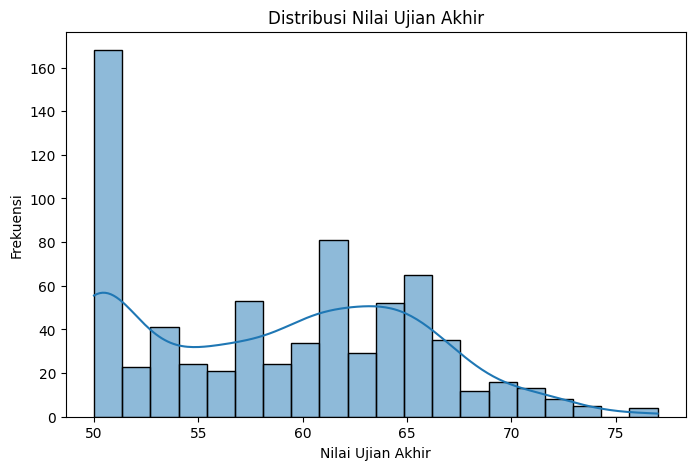

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["Final_Exam_Score"], bins=20, kde=True)
plt.title("Distribusi Nilai Ujian Akhir")
plt.xlabel("Nilai Ujian Akhir")
plt.ylabel("Frekuensi")
plt.show()


# Simpan ke G-Drive


In [20]:
from google.colab import drive
drive.mount('/content/drive')  # Hubungkan Google Drive

!cp /content/TUGAS PEMELAJARAN MESIN /content/drive/MyDrive/  # Salin notebook ke Drive


Mounted at /content/drive
cp: cannot stat '/content/TUGAS': No such file or directory
cp: cannot stat 'PEMELAJARAN': No such file or directory
cp: cannot stat 'MESIN': No such file or directory


# Menampilkan kembali statistik untuk memastikan perbaikan